In [24]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [26]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [27]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [28]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

645

In [29]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [30]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a8423b9b0b4540d4bc80ba07376fa3bb


In [31]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [32]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | buraydah
Processing Record 4 of Set 1 | petatlan
Processing Record 5 of Set 1 | vangaindrano
Processing Record 6 of Set 1 | islamkot
Processing Record 7 of Set 1 | saint-augustin
Processing Record 8 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | bodden town
Processing Record 11 of Set 1 | airai
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | hervey bay
Processing Record 14 of Set 1 | roald
Processing Record 15 of Set 1 | itoman
Processing Record 16 of Set 1 | deshna
City not found. Skipping...
Processing Record 17 of Set 1 | marienburg
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | dunedin
Processing Record 21 of 

Processing Record 38 of Set 4 | klaksvik
Processing Record 39 of Set 4 | mokhotlong
Processing Record 40 of Set 4 | kodiak
Processing Record 41 of Set 4 | ayan
Processing Record 42 of Set 4 | gat
Processing Record 43 of Set 4 | yellowknife
Processing Record 44 of Set 4 | novyy urengoy
Processing Record 45 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 46 of Set 4 | malvern
Processing Record 47 of Set 4 | narsaq
Processing Record 48 of Set 4 | wolmaranstad
City not found. Skipping...
Processing Record 49 of Set 4 | sicuani
Processing Record 50 of Set 4 | tautira
Processing Record 1 of Set 5 | esperance
Processing Record 2 of Set 5 | west wendover
Processing Record 3 of Set 5 | burica
City not found. Skipping...
Processing Record 4 of Set 5 | nalut
Processing Record 5 of Set 5 | baoying
Processing Record 6 of Set 5 | ciudad guayana
Processing Record 7 of Set 5 | salalah
Processing Record 8 of Set 5 | toliary
City not found. Skipping...
Processing Record 9 of Set 5

Processing Record 22 of Set 8 | catarman
Processing Record 23 of Set 8 | askarovo
Processing Record 24 of Set 8 | karratha
Processing Record 25 of Set 8 | dhidhdhoo
Processing Record 26 of Set 8 | pisco
Processing Record 27 of Set 8 | padang
Processing Record 28 of Set 8 | kapuskasing
Processing Record 29 of Set 8 | seydisehir
Processing Record 30 of Set 8 | cidreira
Processing Record 31 of Set 8 | hasaki
Processing Record 32 of Set 8 | arona
Processing Record 33 of Set 8 | palm coast
Processing Record 34 of Set 8 | beringovskiy
Processing Record 35 of Set 8 | coquimbo
Processing Record 36 of Set 8 | urdzhar
City not found. Skipping...
Processing Record 37 of Set 8 | quelimane
Processing Record 38 of Set 8 | hedaru
Processing Record 39 of Set 8 | pouembout
Processing Record 40 of Set 8 | estevan
Processing Record 41 of Set 8 | jizan
Processing Record 42 of Set 8 | anito
Processing Record 43 of Set 8 | sarkand
Processing Record 44 of Set 8 | kotel
Processing Record 45 of Set 8 | antofag

Processing Record 14 of Set 12 | belmonte
Processing Record 15 of Set 12 | namatanai
Processing Record 16 of Set 12 | srednekolymsk
Processing Record 17 of Set 12 | pedasi
Processing Record 18 of Set 12 | abha
Processing Record 19 of Set 12 | bahia honda
Processing Record 20 of Set 12 | kadoma
Processing Record 21 of Set 12 | vestmannaeyjar
Processing Record 22 of Set 12 | marsa matruh
Processing Record 23 of Set 12 | coihaique
Processing Record 24 of Set 12 | maragogi
Processing Record 25 of Set 12 | calabasas
Processing Record 26 of Set 12 | iquitos
Processing Record 27 of Set 12 | ahmadpur east
Processing Record 28 of Set 12 | iberia
Processing Record 29 of Set 12 | kagadi
Processing Record 30 of Set 12 | itarema
Processing Record 31 of Set 12 | andenes
Processing Record 32 of Set 12 | bam
Processing Record 33 of Set 12 | saraipali
Processing Record 34 of Set 12 | umm lajj
Processing Record 35 of Set 12 | suaita
Processing Record 36 of Set 12 | palkaka
City not found. Skipping...
Pr

In [33]:
print(len(city_data))

593


In [35]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,48.67,91,50,8.05,CL,2021-09-01 01:45:32
1,Tuktoyaktuk,69.4541,-133.0374,39.20,87,90,10.36,CA,2021-09-01 01:50:25
2,Buraydah,26.3260,43.9750,82.85,12,2,6.49,SA,2021-09-01 01:50:25
3,Petatlan,17.5167,-101.2667,75.31,94,100,3.27,MX,2021-09-01 01:50:26
4,Vangaindrano,-23.3500,47.6000,68.05,96,18,5.44,MG,2021-09-01 01:50:26
5,Islamkot,24.6997,70.1770,82.81,73,100,7.27,PK,2021-09-01 01:50:26
6,Saint-Augustin,51.2260,-58.6502,53.44,94,100,16.73,CA,2021-09-01 01:50:27
7,Ribeira Grande,38.5167,-28.7000,73.56,86,74,10.98,PT,2021-09-01 01:48:20
8,Bodden Town,19.2833,-81.2500,84.20,83,20,1.99,KY,2021-09-01 01:50:27
9,Airai,-8.9266,125.4092,76.33,40,61,5.70,TL,2021-09-01 01:50:28


In [36]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,CL,2021-09-01 01:45:32,-37.6167,-73.6500,48.67,91,50,8.05
1,Tuktoyaktuk,CA,2021-09-01 01:50:25,69.4541,-133.0374,39.20,87,90,10.36
2,Buraydah,SA,2021-09-01 01:50:25,26.3260,43.9750,82.85,12,2,6.49
3,Petatlan,MX,2021-09-01 01:50:26,17.5167,-101.2667,75.31,94,100,3.27
4,Vangaindrano,MG,2021-09-01 01:50:26,-23.3500,47.6000,68.05,96,18,5.44
5,Islamkot,PK,2021-09-01 01:50:26,24.6997,70.1770,82.81,73,100,7.27
6,Saint-Augustin,CA,2021-09-01 01:50:27,51.2260,-58.6502,53.44,94,100,16.73
7,Ribeira Grande,PT,2021-09-01 01:48:20,38.5167,-28.7000,73.56,86,74,10.98
8,Bodden Town,KY,2021-09-01 01:50:27,19.2833,-81.2500,84.20,83,20,1.99
9,Airai,TL,2021-09-01 01:50:28,-8.9266,125.4092,76.33,40,61,5.70


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

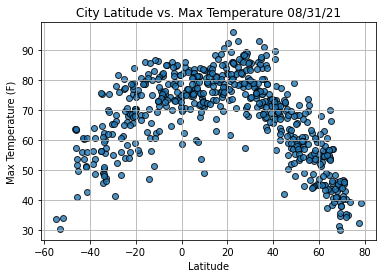

In [39]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

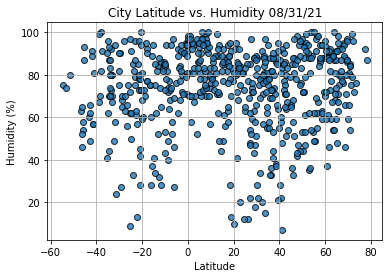

In [40]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

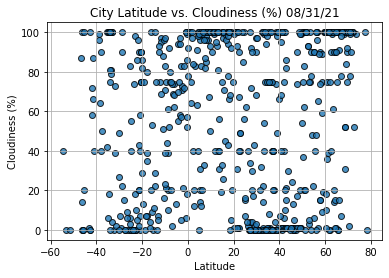

In [41]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

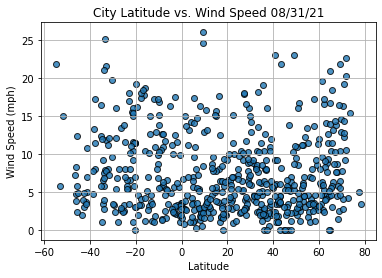

In [42]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()